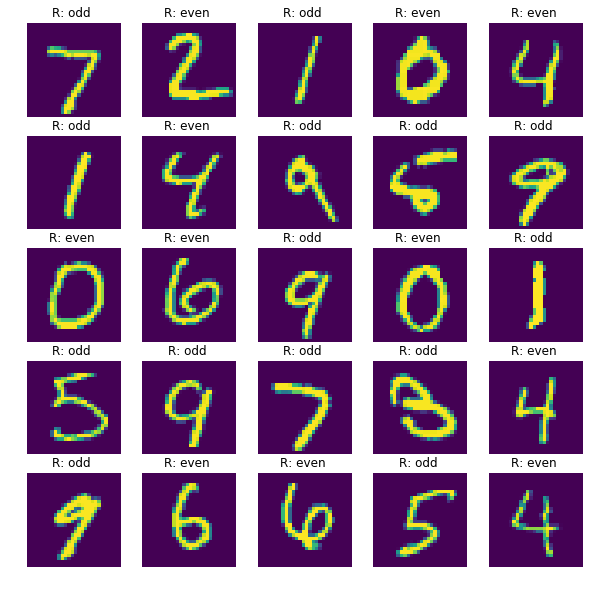

In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

width = 28
height = 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
    
    sub_plt.set_title(sub_plt_title)

plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 143us/step - loss: 0.2994 - acc: 0.8799 - val_loss: 0.1588 - val_acc: 0.9458
Epoch 2/30
50000/50000 [==============================] - 7s 144us/step - loss: 0.1292 - acc: 0.9543 - val_loss: 0.1000 - val_acc: 0.9664
Epoch 3/30
50000/50000 [==============================] - 7s 138us/step - loss: 0.0910 - acc: 0.9680 - val_loss: 0.0826 - val_acc: 0.9724
Epoch 4/30
50000/50000 [==============================] - 8s 162us/step - loss: 0.0721 - acc: 0.9754 - val_loss: 0.0743 - val_acc: 0.9741
Epoch 5/30
50000/50000 [==============================] - 8s 153us/step - loss: 0.0600 - acc: 0.9794 - val_loss: 0.0835 - val_acc: 0.9745
Epoch 6/30
50000/50000 [==============================] - 7s 147us/step - loss: 0.0516 - acc: 0.9823 - val_loss: 0.0619 - val_acc: 0.9806
Epoch 7/30
50000/50000 [==============================] - 8s 150us/step - loss: 0.0440 - acc: 0.9856 - val_loss: 0.0603 - 

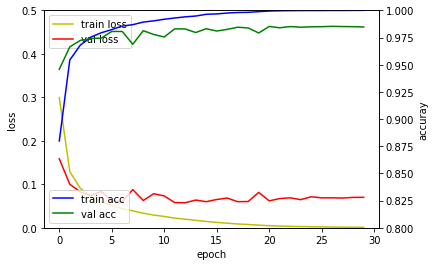

10000/10000 [==============================] - 0s 42us/step
## evaluation loss and_metrics ##
[0.06063582662102672, 0.9854]


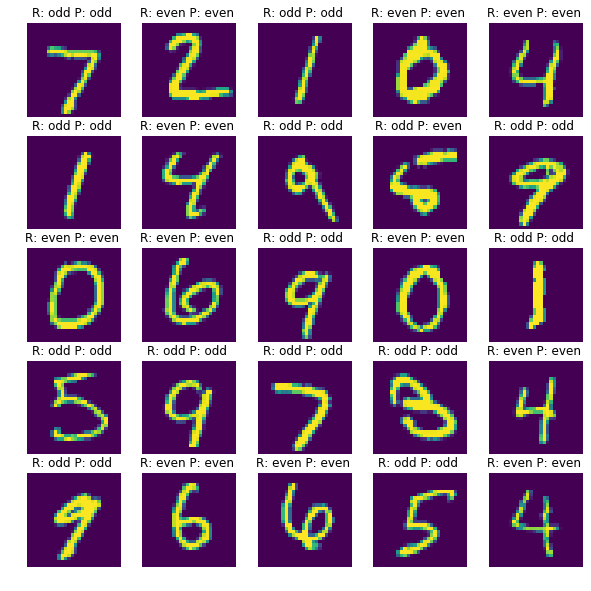

In [4]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 41s 821us/step - loss: 0.3146 - acc: 0.8715 - val_loss: 0.1438 - val_acc: 0.9496
Epoch 2/30
50000/50000 [==============================] - 39s 789us/step - loss: 0.1246 - acc: 0.9541 - val_loss: 0.1097 - val_acc: 0.9614
Epoch 3/30
50000/50000 [==============================] - 40s 804us/step - loss: 0.0832 - acc: 0.9705 - val_loss: 0.0712 - val_acc: 0.9747
Epoch 4/30
50000/50000 [==============================] - 40s 793us/step - loss: 0.0673 - acc: 0.9769 - val_loss: 0.0547 - val_acc: 0.9807
Epoch 5/30
50000/50000 [==============================] - 40s 800us/step - loss: 0.0581 - acc: 0.9795 - val_loss: 0.0516 - val_acc: 0.9828
Epoch 6/30
50000/50000 [==============================] - 40s 802us/step - loss: 0.0514 - acc: 0.9821 - val_loss: 0.0480 - val_acc: 0.9845
Epoch 7/30
50000/50000 [==============================] - 45s 893us/step - loss: 0.0480 - acc: 0.9834 - val_loss: 0.

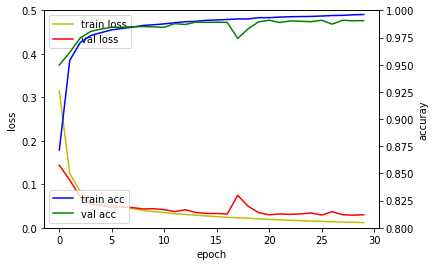

10000/10000 [==============================] - 3s 266us/step
## evaluation loss and_metrics ##
[0.02016694977793377, 0.9937]


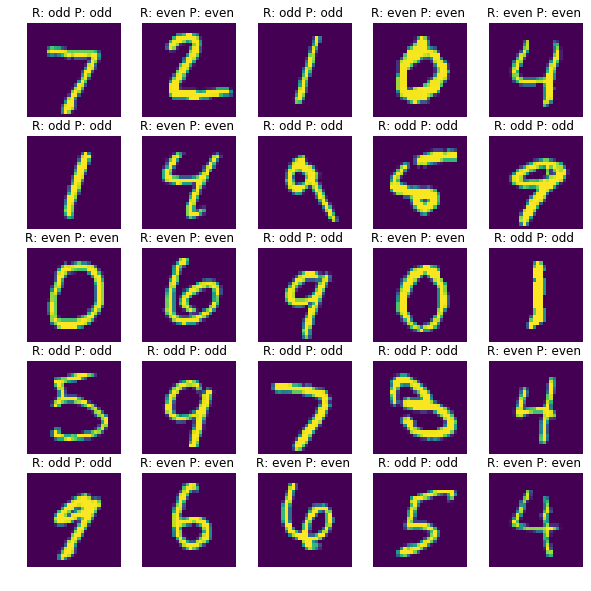

In [5]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 166s 3ms/step - loss: 0.4220 - acc: 0.7981 - val_loss: 0.1725 - val_acc: 0.9391
Epoch 2/30
50000/50000 [==============================] - 166s 3ms/step - loss: 0.1764 - acc: 0.9329 - val_loss: 0.0786 - val_acc: 0.9716
Epoch 3/30
50000/50000 [==============================] - 165s 3ms/step - loss: 0.1189 - acc: 0.9566 - val_loss: 0.0606 - val_acc: 0.9778
Epoch 4/30
50000/50000 [==============================] - 165s 3ms/step - loss: 0.0976 - acc: 0.9646 - val_loss: 0.0530 - val_acc: 0.9810
Epoch 5/30
50000/50000 [==============================] - 168s 3ms/step - loss: 0.0818 - acc: 0.9710 - val_loss: 0.0448 - val_acc: 0.9848
Epoch 6/30
50000/50000 [==============================] - 162s 3ms/step - loss: 0.0722 - acc: 0.9743 - val_loss: 0.0411 - val_acc: 0.9869
Epoch 7/30
50000/50000 [==============================] - 161s 3ms/step - loss: 0.0648 - acc: 0.9778 - val_loss: 0.0367 - 

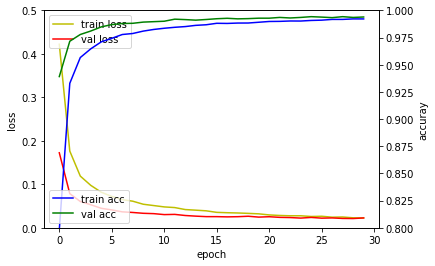

10000/10000 [==============================] - 10s 1ms/step
## evaluation loss and_metrics ##
[0.01322127939464699, 0.9956]


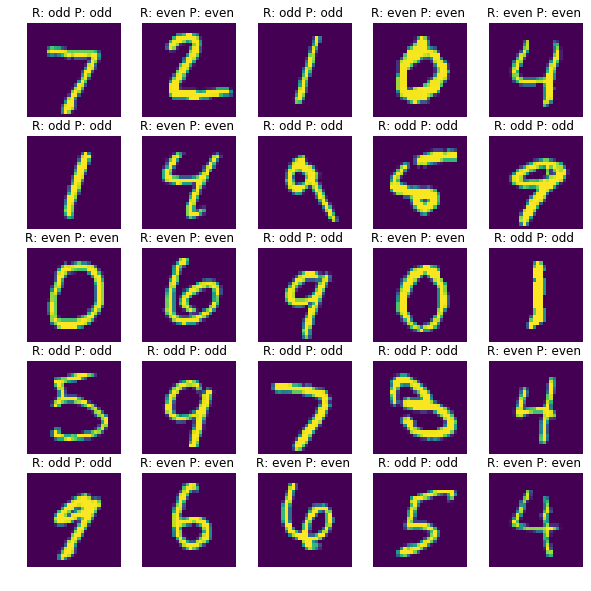

In [7]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '        
    
    sub_plt.set_title(sub_plt_title)

plt.show()